In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,RocCurveDisplay,roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [2]:
PATHNAME = './creditcard.csv'

In [3]:
def loadData():
  df = pd.read_csv(PATHNAME).dropna()
  X = df.drop(df.columns.values[-1:],axis=1)
  y = df.drop(df.columns.values[:-1],axis=1)
  y_minority = 1
  return X.to_numpy(),y.to_numpy(), y_minority

In [4]:
'''
  Analysing dataset
'''
X,y,y_minority = loadData()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
y_train = y_train.ravel()
y_test = y_test.ravel()
print(len(X_test[np.all([y_test==1],axis=0)]))
print(len(X_test[np.all([y_test==0],axis=0)]))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

101
56861
(227845, 30) (227845,) (56962, 30) (56962,)


In [5]:
class RusBoost:
  def __init__(self,n_classifiers,base_classifier,percentage_oversample,learning_rate,supports_class_probabilities=False):
    self.n_classifiers = n_classifiers
    self.algorithm='SAMME'
    if supports_class_probabilities:
      self.algorithm='SAMME.R'
    
    self.classifier = AdaBoostClassifier(base_estimator=base_classifier,n_estimators=self.n_classifiers,learning_rate=learning_rate)
    self.percentage_oversample = percentage_oversample

  def fit(self,X,y,majority_class,minority_class):
    x_final,y_final = self.Rus(X,y,majority_class,minority_class)
    self.classifier.fit(x_final,y_final)
    return self.classifier.score(x_final,y_final)

  def predict(self,x_predict):
    return self.classifier.predict(x_predict)
  
  def Rus(self,x_in, y_in, oversample_label=1, undersample_label=0 ):
    assert(self.percentage_oversample > 0)
    x_oversampled = x_in[:][y_in==oversample_label]
    x_undersampled = x_in[:][y_in==undersample_label]
    assert(len(x_oversampled) >= len(x_undersampled))
    selected_list = np.random.choice(len(x_oversampled),int(len(x_undersampled)*self.percentage_oversample/(100-self.percentage_oversample)),replace=False)
    x_selected = []
    y_final = []
    for i in selected_list:
      x_selected.append(x_oversampled[i])
      y_final.append(oversample_label)
    for i in x_undersampled:
      x_selected.append(i)
      y_final.append(undersample_label)
    x_selected = np.array(x_selected)#.reshape(len(selected_list),x_oversampled.shape[1])
    y_final = np.array(y_final).reshape(len(y_final),)
    shuffler = np.random.permutation(len(y_final))
    x_selected = x_selected[shuffler]
    y_final = y_final[shuffler]
    return x_selected,y_final



True  + :  89
True  - :  56029
False + :  832
False - : 12
Majority class accuracy 98.53678268057192
Minority class accuracy 88.11881188118812
Precision :  0.09663409337676439
Recall :  0.8811881188118812




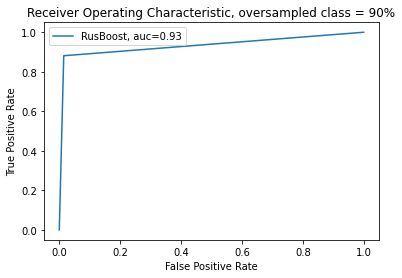

True  + :  87
True  - :  56180
False + :  681
False - : 14
Majority class accuracy 98.80234255465082
Minority class accuracy 86.13861386138613
Precision :  0.11328125
Recall :  0.8613861386138614




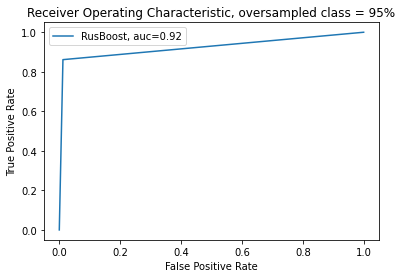

True  + :  86
True  - :  56480
False + :  381
False - : 15
Majority class accuracy 99.32994495348305
Minority class accuracy 85.14851485148515
Precision :  0.1841541755888651
Recall :  0.8514851485148515




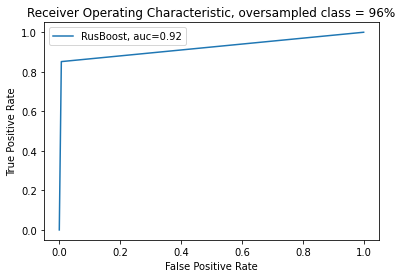

True  + :  87
True  - :  56551
False + :  310
False - : 14
Majority class accuracy 99.45481085454001
Minority class accuracy 86.13861386138613
Precision :  0.21914357682619648
Recall :  0.8613861386138614




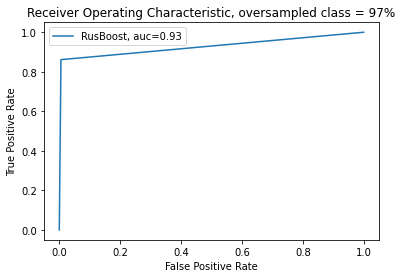

True  + :  85
True  - :  56651
False + :  210
False - : 16
Majority class accuracy 99.63067832081744
Minority class accuracy 84.15841584158416
Precision :  0.288135593220339
Recall :  0.8415841584158416




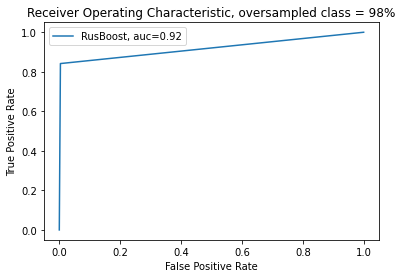

True  + :  85
True  - :  56735
False + :  126
False - : 16
Majority class accuracy 99.77840699249046
Minority class accuracy 84.15841584158416
Precision :  0.4028436018957346
Recall :  0.8415841584158416




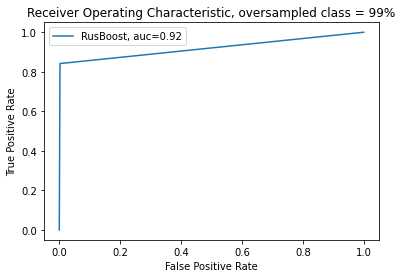

True  + :  85
True  - :  56727
False + :  134
False - : 16
Majority class accuracy 99.76433759518827
Minority class accuracy 84.15841584158416
Precision :  0.3881278538812785
Recall :  0.8415841584158416




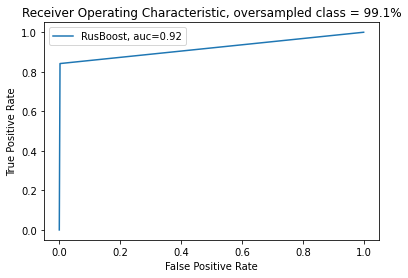

True  + :  84
True  - :  56761
False + :  100
False - : 17
Majority class accuracy 99.82413253372259
Minority class accuracy 83.16831683168317
Precision :  0.45652173913043476
Recall :  0.8316831683168316




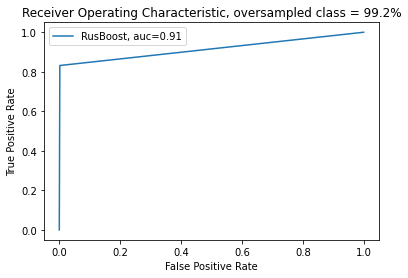

True  + :  84
True  - :  56758
False + :  103
False - : 17
Majority class accuracy 99.81885650973426
Minority class accuracy 83.16831683168317
Precision :  0.44919786096256686
Recall :  0.8316831683168316




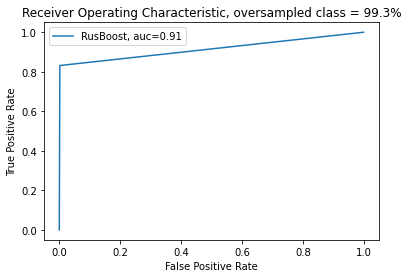

True  + :  86
True  - :  56786
False + :  75
False - : 15
Majority class accuracy 99.86809940029194
Minority class accuracy 85.14851485148515
Precision :  0.5341614906832298
Recall :  0.8514851485148515




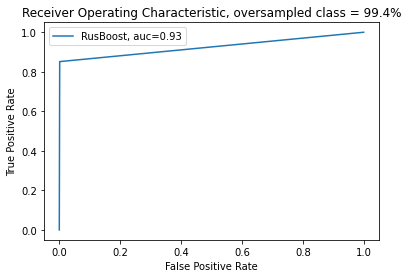

True  + :  82
True  - :  56790
False + :  71
False - : 19
Majority class accuracy 99.87513409894304
Minority class accuracy 81.18811881188118
Precision :  0.5359477124183006
Recall :  0.8118811881188119




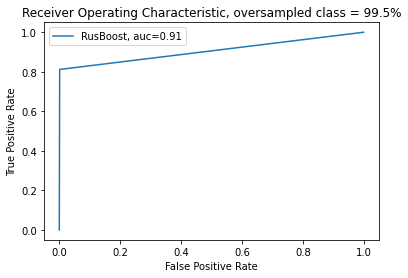

True  + :  79
True  - :  56838
False + :  23
False - : 22
Majority class accuracy 99.9595504827562
Minority class accuracy 78.21782178217822
Precision :  0.7745098039215687
Recall :  0.7821782178217822




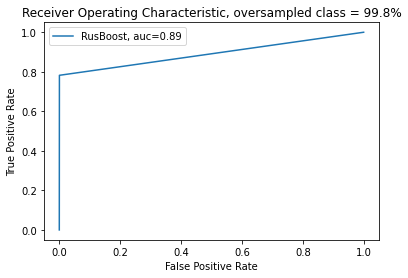

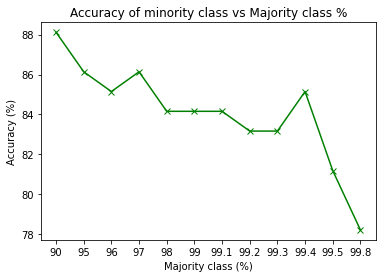

In [11]:
osp = [90,95,96,97,98,99,99.1,99.2,99.3,99.4,99.5,99.8]
X,y, y_minority = loadData()
mca = []

for ov in osp:
  y = y.ravel()  
  # WITH SMOTED DATA
  # sm = SMOTE(random_state=0) 
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
  y_train = y_train.ravel()
  y_test = y_test.ravel()
  classifier = DecisionTreeClassifier()
  model = RusBoost(100,classifier,ov,0.1)
  score = model.fit(X_train,y_train,1-y_minority,y_minority)
  y_predict = model.predict(X_test)

  tp = 0
  tn = 0
  fp = 0
  fn = 0
  for i in range(len(y_test)):
    if y_test[i] != y_minority and y_predict[i] != y_minority:
      tn += 1
      y_test[i] = 0
      y_predict[i] = 0
    elif y_test[i] != y_minority and y_predict[i] == y_minority:
      fp += 1
      y_test[i] = 0
      y_predict[i] = 1
    elif y_test[i] == y_minority and y_predict[i] != y_minority:
      fn += 1
      y_test[i] = 1
      y_predict[i] = 0
    elif y_test[i] == y_minority and y_predict[i] == y_minority:
      tp += 1
      y_test[i] = 1
      y_predict[i] = 1
  print('True  + : ',tp)
  print('True  - : ',tn)
  print('False + : ',fp)
  print('False - :',fn)
  print('Majority class accuracy',100*tn/(tn+fp))
  print('Minority class accuracy',100*tp/(tp+fn))
  mca.append(100*tp/(tp+fn))
  print('Precision : ',tp/(tp+fp))
  print('Recall : ',tp/(tp+fn))
  fpr, tpr, thresholds = roc_curve(y_test, y_predict)
  roc_auc = auc(fpr, tpr)
  print()
  print()
  plt.plot(fpr,tpr,label='RusBoost, auc='+str(round(roc_auc, 2)))
  plt.title('Receiver Operating Characteristic, oversampled class = '+str(ov)+'%')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend()
  plt.show()

plt.plot([str(i) for i in osp],mca,c='g',marker='x')
plt.title('Accuracy of minority class vs Majority class %')
plt.ylabel('Accuracy (%)')
plt.xlabel('Majority class (%)')
plt.show()